### Decision tree

A decision tree is a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one of the predictive modeling approaches used in machine learning.

### Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.svm import SVC

In [2]:
data_source_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_source_url, names=col_names, header=None, sep=",")

In [3]:
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bankdata['class'].unique()

array([0, 1])

class 0 => fake bank notes

class 1 => real bank notes

In [6]:
bankdata.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
bankdata.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [9]:
bankdata.isnull().all()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [10]:
# predictor and target variables

y = bankdata['class']
X = bankdata[['skewness', 'curtosis']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
bankdata.shape

(1372, 5)

In [13]:
X_train.shape

(1097, 2)

In [14]:
X_test.shape

(275, 2)

#### SVM

SVC in sklearn = Support Vector Classifier

In [15]:
svm_model = SVC(kernel='linear')

In [16]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [19]:
y_pred.shape

(275,)

In [20]:
type(y_pred)

numpy.ndarray

In [22]:
# evaluate the model

svm_acc = accuracy_score(y_test, y_pred)

print('SVM accuracy: ', svm_acc * 100)

SVM accuracy:  77.81818181818181


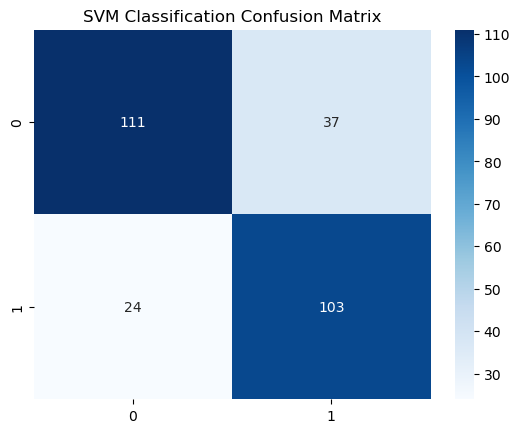

In [24]:
# confusion matrix

cnf = confusion_matrix(y_test, y_pred)

# plot on heatmap
sns.heatmap(cnf, annot=True, cmap='Blues', fmt="d").set_title('SVM Classification Confusion Matrix');


/home/aceix/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


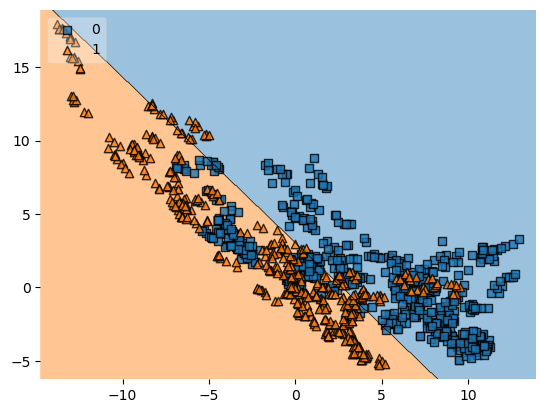

In [27]:
# visualising the SVM

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values, y_train.values, clf=svm_model, legend=2)
plt.show()


/home/aceix/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


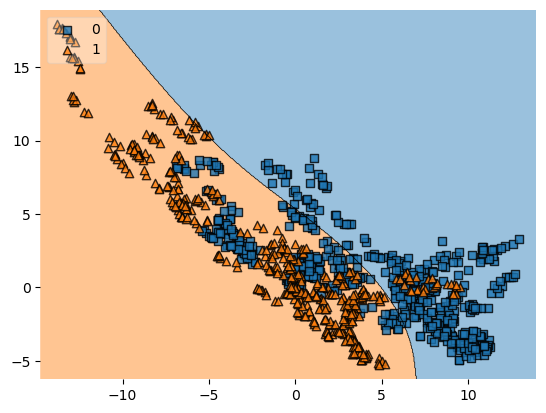

In [28]:
svm_model_poly = SVC(kernel='poly')

svm_model_poly.fit(X_train, y_train)

plot_decision_regions(X_train.values, y_train.values, clf=svm_model_poly, legend=2)
plt.show()

/home/aceix/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


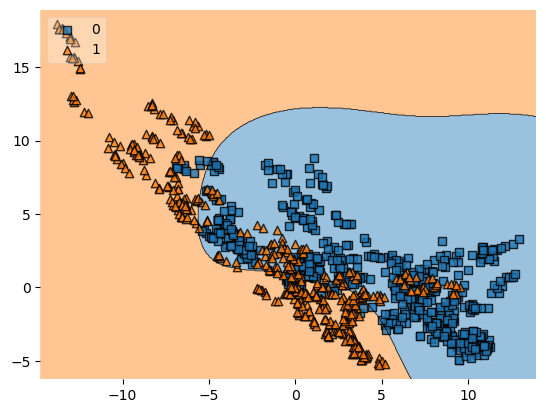

In [29]:
svm_model_auto = SVC()

svm_model_auto.fit(X_train, y_train)

plot_decision_regions(X_train.values, y_train.values, clf=svm_model_auto, legend=2)
plt.show()

In [30]:
svm_model_auto.kernel

'rbf'

### Decision Tree

In [31]:
dtclf = DecisionTreeClassifier()

In [39]:
hist = dtclf.fit(X_train, y_train)

In [34]:
y_pred = dtclf.predict(X_test)

In [36]:
# accuracy

dt_acc = accuracy_score(y_test, y_pred)

print('Decision Tree accuracy: ', dt_acc * 100)

Decision Tree accuracy:  86.54545454545455


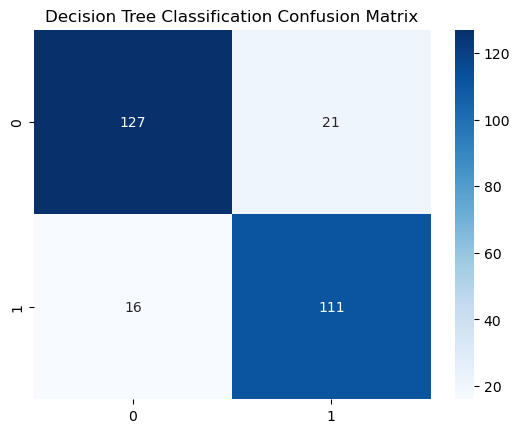

In [37]:
# confusion matrix

cnf = confusion_matrix(y_test, y_pred)

# plot on heatmap

sns.heatmap(cnf, annot=True, cmap='Blues', fmt="d").set_title('Decision Tree Classification Confusion Matrix');

In [41]:
from sklearn import tree

b = tree.export_text(hist, feature_names=list(X.columns))

print(b)

|--- skewness <= 5.16
|   |--- curtosis <= -0.03
|   |   |--- curtosis <= -2.24
|   |   |   |--- class: 1
|   |   |--- curtosis >  -2.24
|   |   |   |--- skewness <= 2.02
|   |   |   |   |--- skewness <= 1.47
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- skewness >  1.47
|   |   |   |   |   |--- skewness <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- skewness >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- skewness >  2.02
|   |   |   |   |--- curtosis <= -1.08
|   |   |   |   |   |--- skewness <= 3.72
|   |   |   |   |   |   |--- curtosis <= -1.54
|   |   |   |   |   |   |   |--- curtosis <= -2.04
|   |   |   |   |   |   |   |   |--- curtosis <= -2.14
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- curtosis >  -2.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- curtosis >  -2.04
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- curtosis >